<a href="https://colab.research.google.com/github/Nishchay-29/Credit-card-fraud-detection/blob/main/credit_card_fraud_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('creditcard.csv')


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.shape

(211990, 31)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,211990.0,74338.899245,36867.401364,0.000000,45761.000000,69773.000000,112066.750000,138664.000000
V1,211990.0,-0.082446,1.909113,-56.407510,-0.953498,-0.058291,1.227441,2.454930
V2,211990.0,-0.004057,1.631394,-72.715728,-0.589128,0.075315,0.781114,22.057729
V3,211990.0,0.255986,1.467115,-33.680984,-0.445879,0.437946,1.189327,9.382558
V4,211990.0,0.060509,1.404102,-5.683171,-0.807693,0.061376,0.863249,16.875344
V5,211990.0,-0.087386,1.364220,-42.147898,-0.766842,-0.146809,0.498306,34.801666
V6,211990.0,0.040294,1.315733,-26.160506,-0.719268,-0.226442,0.440132,22.529298
V7,211990.0,-0.038154,1.218483,-43.557242,-0.571768,-0.000192,0.517127,36.677268
V8,211990.0,0.010719,1.205495,-73.216718,-0.187794,0.038178,0.334601,20.007208
V9,211990.0,0.006475,1.130097,-13.434066,-0.662056,-0.070713,0.620404,15.594995


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211990 entries, 0 to 211989
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    211990 non-null  float64
 1   V1      211990 non-null  float64
 2   V2      211990 non-null  float64
 3   V3      211990 non-null  float64
 4   V4      211990 non-null  float64
 5   V5      211990 non-null  float64
 6   V6      211990 non-null  float64
 7   V7      211990 non-null  float64
 8   V8      211990 non-null  float64
 9   V9      211990 non-null  float64
 10  V10     211989 non-null  float64
 11  V11     211989 non-null  float64
 12  V12     211989 non-null  float64
 13  V13     211989 non-null  float64
 14  V14     211989 non-null  float64
 15  V15     211989 non-null  float64
 16  V16     211989 non-null  float64
 17  V17     211989 non-null  float64
 18  V18     211989 non-null  float64
 19  V19     211989 non-null  float64
 20  V20     211989 non-null  float64
 21  V21     21

In [7]:
fraud = data[data.Class == 1]
valid = data[data.Class == 0]
outlierFraction = len(fraud) / float(len(valid))
outlierFraction

0.0018620477799569932

In [8]:
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Fraud Cases: 394
Valid Transactions: 211595


In [9]:
fraud.Amount.describe()

count     394.000000
mean      123.172970
std       256.841767
min         0.000000
25%         1.000000
50%        13.385000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
valid.Amount.describe()

count    211595.000000
mean         90.042226
std         248.388744
min           0.000000
25%           6.000000
50%          23.080000
75%          79.600000
max       19656.530000
Name: Amount, dtype: float64

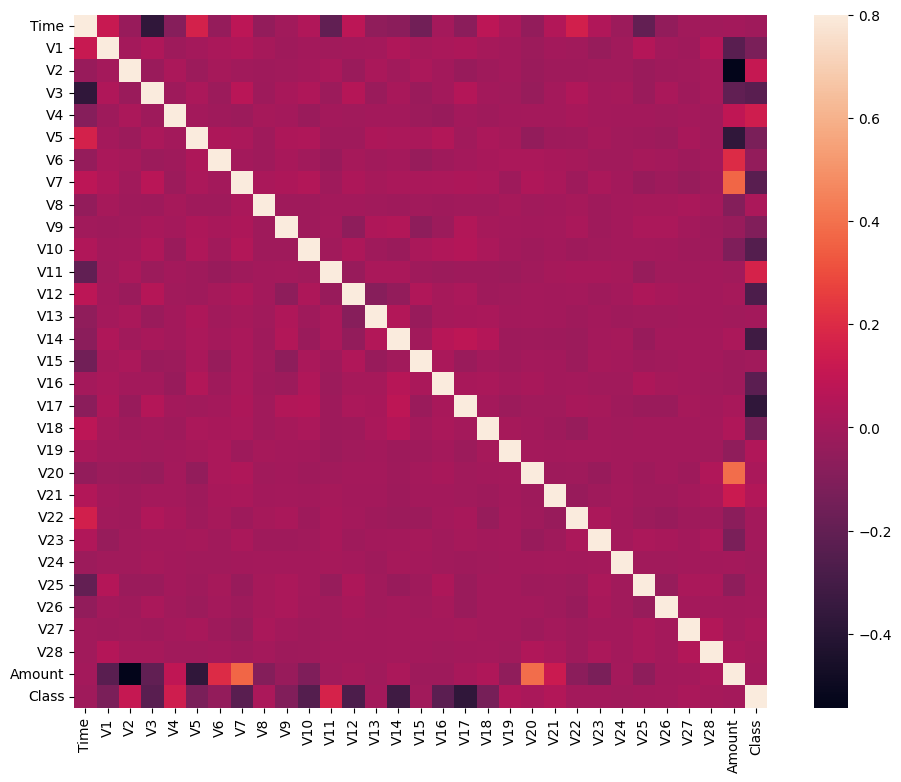

In [11]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:
X = data.drop(['Class'], axis = 1)
y = data.Class
X.shape, y.shape

((211990, 30), (211990,))

In [13]:
X_data = X.values
y_data = y.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .2,
                                                   random_state = 42)

In [15]:
rfc = RandomForestClassifier()

In [18]:
X_train

array([[ 6.95680000e+04,  4.93181276e-01, -6.16686949e-01, ...,
         2.48672398e-02, -7.50858935e-02,  1.00000000e+01],
       [ 2.78400000e+03, -3.60426249e-01,  5.00701147e-01, ...,
         2.19752066e-01, -1.99518475e-02,  1.00000000e+00],
       [ 1.38646000e+05,  2.10810835e+00, -2.07739554e-01, ...,
        -9.39989836e-02, -9.19453793e-02,  7.60000000e-01],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01,  3.94000000e+00],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01,  1.00000000e+00],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  1.13000000e+02]])

In [19]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
rfc.fit(X_train, y_train)

ValueError: ignored

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create an imputer to fill in missing values (e.g., with the mean of the column)
imputer = SimpleImputer(strategy='mean')

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Create a pipeline to sequentially apply the imputer and then the classifier
pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', rf_classifier)
])

# Fit and use the pipeline as you would with the classifier alone
pipeline.fit(X_train, y_train)

ValueError: ignored

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, pred)
acc

In [ ]:
prec = precision_score(y_test, pred)
prec

In [ ]:
rec = recall_score(y_test, pred)
rec

In [ ]:
f1 = f1_score(y_test, pred)
f1

In [ ]:
mcc = matthews_corrcoef(y_test, pred)
mcc

In [ ]:
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True,
           fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()